<a href="https://colab.research.google.com/github/abhiruppeeyalsinha/SD_Pytorch/blob/main/SSD_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q mxnet
!pip install -q gluoncv

ERROR: Operation cancelled by user


In [ ]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv_imshow

In [ ]:
# from gluoncv import model_zoo,data,utils
import matplotlib.pyplot as plt,os
model = torchvision.models.detection.ssd300_vgg16(pretrained = True)


# net = model_zoo.get_model('ssd_512_resnet50_v1_voc',pretrained = True)




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:00<00:00, 294MB/s]


In [ ]:
model.eval()

In [ ]:
img  = Image.open("/content/DOG_2.png").convert('RGB')
transform = T.ToTensor()
img = transform(img)

In [ ]:
with torch.no_grad():
  pred = model([img])

In [ ]:
pred

[{'boxes': tensor([[7.9212e+02, 2.0601e+02, 1.5184e+03, 1.0800e+03],
          [2.9607e+02, 1.1685e+01, 9.0975e+02, 6.6333e+02],
          [1.3566e+01, 2.0300e+01, 6.0059e+02, 7.3194e+02],
          [1.0334e+03, 0.0000e+00, 1.2225e+03, 8.8852e+01],
          [1.0331e+03, 7.0277e-01, 1.2231e+03, 9.0490e+01],
          [3.2690e+02, 3.7144e+01, 8.9183e+02, 6.3953e+02],
          [1.1270e+03, 0.0000e+00, 1.8979e+03, 3.5196e+02],
          [1.8012e+02, 1.4031e+01, 9.7949e+02, 6.6376e+02],
          [0.0000e+00, 6.4233e+02, 6.7689e+02, 1.0565e+03],
          [7.6557e+02, 4.0079e-01, 1.8656e+03, 1.6641e+02],
          [8.2193e+01, 0.0000e+00, 8.0070e+02, 9.4116e+02],
          [8.6795e+02, 2.2708e+02, 1.2768e+03, 5.5790e+02],
          [7.5360e+02, 1.4302e+00, 1.1866e+03, 2.2401e+02],
          [1.0243e+03, 4.7204e+02, 1.5188e+03, 1.0451e+03],
          [9.3587e+02, 4.6813e+00, 1.3835e+03, 1.9955e+02],
          [2.8581e+02, 2.8379e+01, 1.6336e+03, 1.0796e+03],
          [0.0000e+00, 5.7650e+

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [ ]:
bounding_box, scr, labels, = pred[0]['boxes'],pred[0]['scores'],pred[0]['labels']


In [ ]:
labels

tensor([18, 62, 75, 62, 62, 62, 47, 62, 62, 62, 62, 62, 62, 37, 62, 18, 63, 62,
        62, 67, 62, 62, 62, 62, 62, 62,  1, 62, 62, 62, 20, 62,  1,  1, 62, 62,
         1, 16, 16, 62, 16, 62, 62,  1, 62, 16, 62, 67,  1, 67,  1, 47, 62, 62,
        16, 62, 67, 74, 67, 16,  1,  1, 10,  1, 16, 18, 62, 62, 62,  1,  1, 47,
         1, 16, 62,  1, 62, 62, 62, 62,  1, 62,  1, 62,  1,  1, 16,  1, 16, 20,
        62, 16,  1, 62,  1, 47, 62, 62,  1, 62, 15,  1, 16, 62, 16, 16,  1, 32,
         1, 62,  1, 67, 62, 16, 32, 62,  1, 67, 34, 62, 16, 32,  1, 18,  1, 32,
        16,  1, 16, 18,  1, 16,  1, 32, 18, 18, 32, 16,  1, 16, 18, 16, 47,  1,
         1, 16,  2, 32,  1, 18, 32, 16, 16,  1,  1, 16,  1,  1,  1,  1,  1, 16,
        16, 84, 67, 18,  1,  1,  1,  1,  1, 32,  1,  1, 32, 16, 16, 35, 47, 16,
        84, 32,  1, 18, 18, 32,  1,  1, 16,  1,  1,  1,  1,  1,  1,  1, 32, 49,
        16,  1])

In [ ]:
num = torch.argwhere(scr>0.5).shape[0]

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
img_file = cv2.imread('/content/DOG_2.png')
for i in range(num):
  x1,y1,x2,y2 = bounding_box[i].numpy().astype("int")
  igg = cv2.rectangle(img_file,(x1,y1),(x2,y2),(255,0,255),2)
  class_names = coco_names[labels.numpy()[i] -1 ]
  igg = cv2.putText(img_file,class_names,(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,0.9,(255,0,50),3,cv2.LINE_AA)



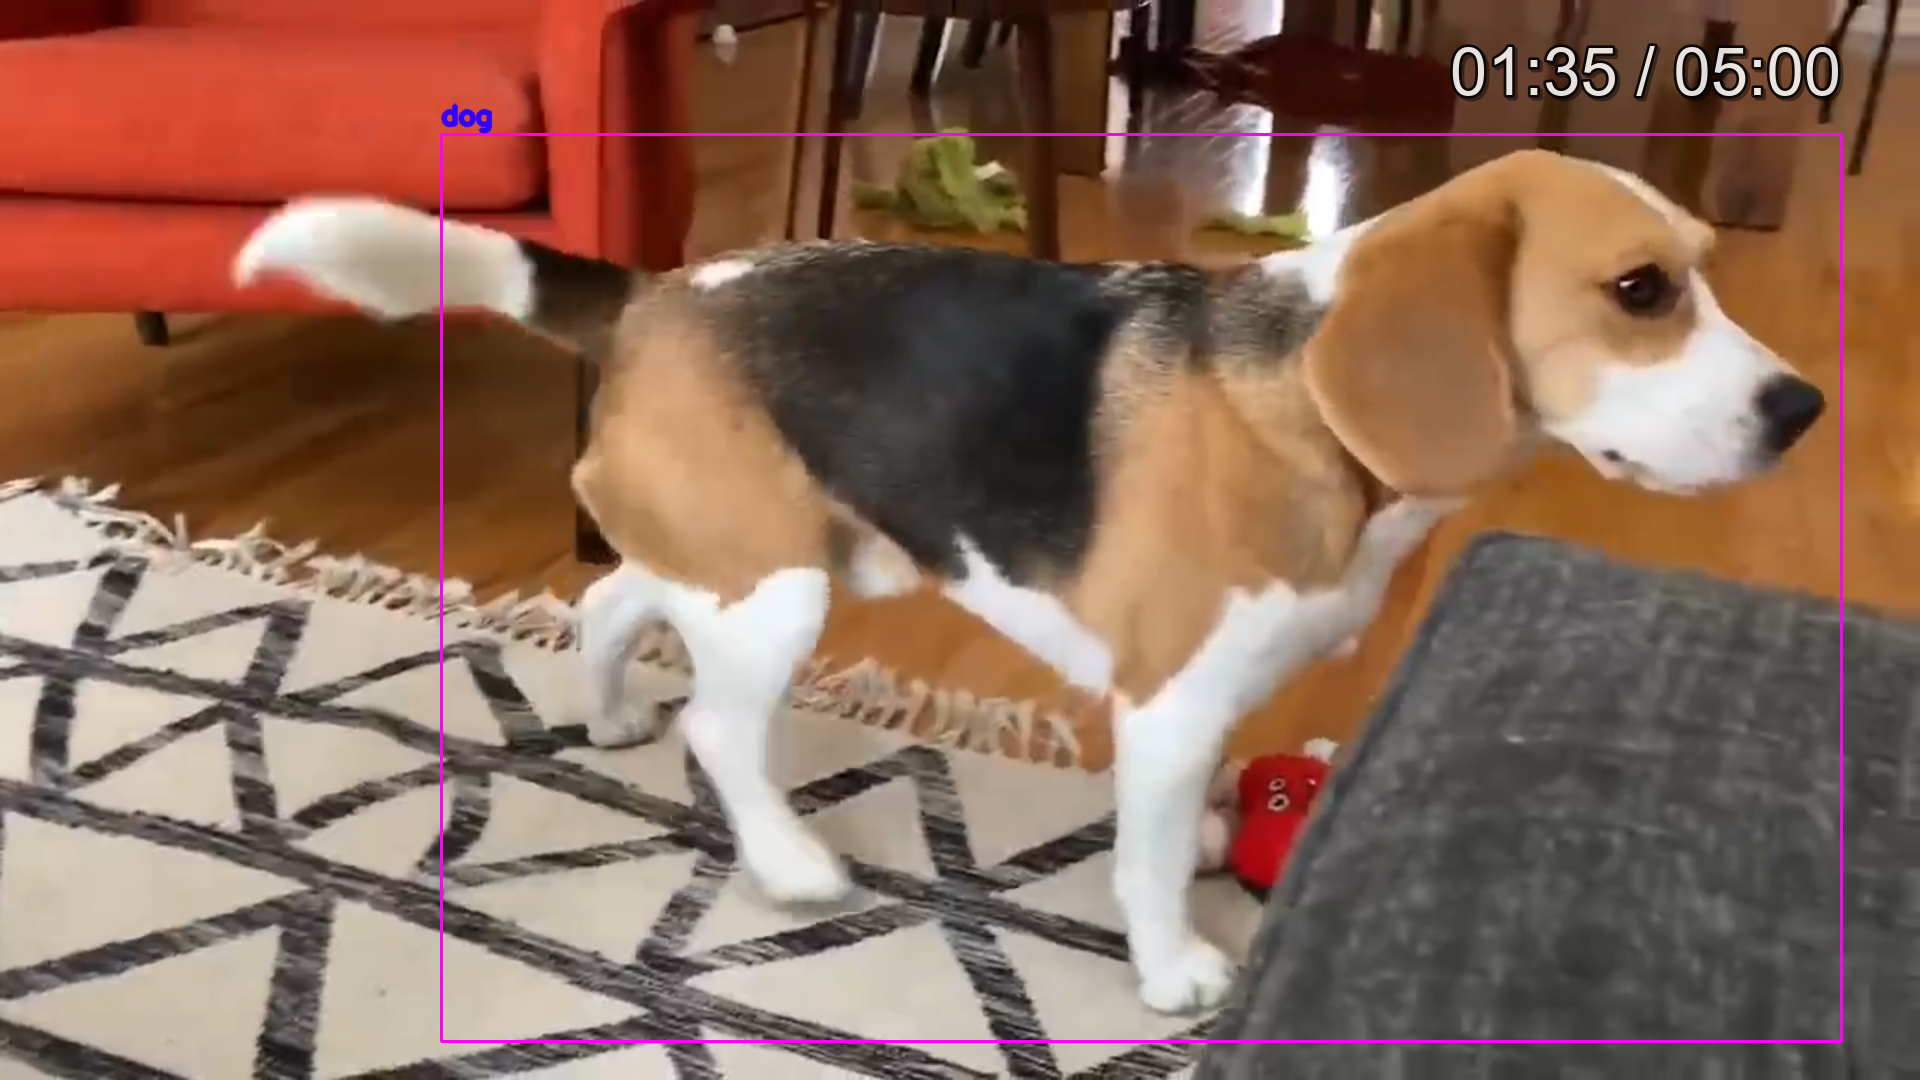

In [ ]:
cv_imshow(img_file)